# 🚢 **Projet d'Analyse des Données : Titanic**

##  Professeur :
- **Docteur YOSSRA HAJJAJI** 🌟

---

### 🎓 **Matière** : Introduction à l'Intelligence Artificielle

### Date : *04/03/2025* ✍️
👨‍💻 Étudiant : Aldiouma Mbaye
---

## 📌 **Objectif du Projet**
L'objectif de ce projet est d'analyser les données des passagers du Titanic afin de prédire leur probabilité de survie en fonction de différentes caractéristiques telles que l'âge, le sexe, la classe sociale, etc. Ce projet met en œuvre des techniques de **prétraitement des données**, d'**exploration**, et de **modélisation** via des algorithmes de Machine Learning.

---

## 📂 **Description des Données**
Le dataset est composé de plusieurs fichiers :

- **train.csv** : Ensemble d'entraînement contenant les passagers avec leur statut de survie.
- **test.csv** : Ensemble de test utilisé pour l'évaluation du modèle.
- **gender_submission.csv** : Exemple de prédictions attendues.
- **Titanic_Dataset.csv** : Une version alternative combinant les données.

### 🏷️ **Attributs Principaux**
- `PassengerId` : Identifiant unique du passager
- `Survived` : Statut de survie (1 = Oui, 0 = Non)
- `Pclass` : Classe du passager (1ère, 2ème, 3ème)
- `Name` : Nom du passager
- `Sex` : Sexe du passager
- `Age` : Âge du passager
- `SibSp` : Nombre de frères/sœurs/conjoints à bord
- `Parch` : Nombre de parents/enfants à bord
- `Ticket` : Numéro du billet
- `Fare` : Tarif du billet
- `Cabin` : Numéro de cabine
- `Embarked` : Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)

---

## 🛠️ **Étape 1 : Prétraitement des Données**
Avant d'entraîner un modèle, nous devons nettoyer et transformer les données :

1. **Gestion des valeurs manquantes**
   - Imputation des valeurs manquantes (`Age`, `Embarked`, `Cabin`)
   - Suppression ou transformation de certaines variables

2. **Encodage des variables catégorielles**
   - Mapping `Sex` (`male → 0`, `female → 1`)
   - Encodage One-Hot de `Embarked`

3. **Mise à l’échelle des variables**
   - Standardisation de `Age` et `Fare`

4. **Gestion des outliers**
   - Transformation logarithmique de `Fare`

---

## 🤖 **Étape 2 : Modélisation et Prédiction**
Après le prétraitement, nous allons entraîner plusieurs modèles de classification pour prédire la survie des passagers :

- **Régression Logistique**
- **K-Nearest Neighbors (KNN)**
- **Random Forest**
- **Gradient Boosting**

Nous comparerons les performances de chaque modèle à l’aide des **métriques d’évaluation** comme l’**exactitude (accuracy)**, la **matrice de confusion**, et l’**AUC-ROC**.

---

## 📊 **Étape 3 : Analyse et Visualisation des Résultats**
Nous utiliserons des bibliothèques comme **Matplotlib**, **Seaborn** et **Plotly** pour explorer et visualiser les résultats.

### 🔍 **Quelques analyses prévues :**
- Taux de survie par classe et sexe
- Influence de l’âge sur la survie
- Corrélations entre les variables

---

## 🎯 **Conclusion et Perspectives**
Nous conclurons en analysant les performances du modèle final et en suggérant des améliorations possibles, telles que l'utilisation de modèles plus avancés (**Deep Learning**, **Feature Engineering**, etc.).

---

### 📌 **Technologies Utilisées**
- **Python** : Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
- **Jupyter Notebook** : Environnement de développement
- **Machine Learning** : Modèles de classification supervisée

---

🚀 **À vos marques, prêts, analysons !**



# IMPORTATION DES Modules 

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Chargement des données

In [33]:

train_df = pd.read_csv('C:/Users/aldio/OneDrive/Bureau/VISUALISATION DES DONNE/ProjetMlACP/acp/titanic/titanic/train.csv')
test_df = pd.read_csv('C:/Users/aldio/OneDrive/Bureau/VISUALISATION DES DONNE/ProjetMlACP/acp/titanic/titanic/test.csv')
gender_submission_df = pd.read_csv('C:/Users/aldio/OneDrive/Bureau/VISUALISATION DES DONNE/ProjetMlACP/acp/titanic/titanic//gender_submission.csv')
titanic_dataset_df = pd.read_csv('C:/Users/aldio/OneDrive/Bureau/VISUALISATION DES DONNE/ProjetMlACP/acp/titanic//Titanic_Dataset.csv')


## 🛠️ **Étape 1 : Prétraitement des Données**

# 1. Gestion des données manquantes

In [34]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Imputation des valeurs manquantes
# Pour la colonne 'Age', j'ai choisi d'utiliser la médiane pour imputer les valeurs manquantes, 
# car cela permet de traiter les valeurs extrêmes sans les affecter.
imputer_age = SimpleImputer(strategy='median')
train_df['Age'] = imputer_age.fit_transform(train_df[['Age']])
test_df['Age'] = imputer_age.transform(test_df[['Age']])

# Pour la colonne 'Embarked', j'ai décidé de remplir les valeurs manquantes avec le mode, 
# car cela correspond à la valeur la plus fréquente dans cette colonne.
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Pour la colonne 'Fare' dans test.csv, j'ai utilisé la médiane pour remplir les valeurs manquantes. 
# Cela garantit que les valeurs manquantes ne faussent pas l'analyse tout en préservant la distribution des données.
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Suppression des colonnes inutiles ('Ticket' et 'Cabin')
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)


**Encodage des variables catégorielles**

In [35]:

# J'ai utilisé LabelEncoder pour encoder la colonne 'Sex' (male = 0, female = 1), 
# car il s'agit d'une variable binaire et cela simplifie l'analyse.
encoder = LabelEncoder()
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = encoder.transform(test_df['Sex'])

# Pour la colonne 'Embarked', j'ai choisi le codage One-Hot, 
# car cela permet de transformer cette variable catégorielle en plusieurs colonnes binaires. 
# J'ai également utilisé drop_first=True pour éviter la colinéarité.
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

**Mise à l’échelle des variables**

In [36]:
# J'ai utilisé le StandardScaler pour mettre à l'échelle les variables 'Age' et 'Fare' 
# afin qu'elles aient une moyenne de 0 et un écart-type de 1. Cela aide à améliorer les performances des modèles de machine learning.
scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])

**Gestion des outliers**

In [37]:
# 4. Gestion des valeurs aberrantes (outliers) pour la colonne 'Fare'
# Utilisation de la méthode IQR (intervalle interquartile) pour identifier et limiter les valeurs extrêmes.
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remplacement des outliers par les valeurs limites définies par les quartiles pour éviter qu'ils n'influencent de manière disproportionnée le modèle.
train_df['Fare'] = np.where(train_df['Fare'] < lower_bound, lower_bound, train_df['Fare'])
train_df['Fare'] = np.where(train_df['Fare'] > upper_bound, upper_bound, train_df['Fare'])

In [38]:
# Affichage des premières lignes après nettoyage pour vérifier le résultat
print(train_df.head())
print(test_df.head())

# Vérification des valeurs manquantes après traitement
print(train_df.isnull().sum())
print(test_df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                             Heikkinen, Miss. Laina    0 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                           Allen, Mr. William Henry    1  0.433312      0   

   Parch      Fare  Embarked_Q  Embarked_S  
0      0 -0.502445       False        True  
1      0  0.673106       False       False  
2      0 -0.488854       False        True  
3      0  0.420730       False        True  
4      0 -0.486337       False        True  
   PassengerId  Pclass                      

# Vérifions si toutes les conditions sont remplies avant de commencer notre analyse exploratoire des données (EDA)

In [41]:
# Vérification des valeurs manquantes dans train_df et test_df
print("Valeurs manquantes dans train_df :")
print(train_df.isnull().sum())
print("\nValeurs manquantes dans test_df :")
print(test_df.isnull().sum())

# Vérification des doublons dans train_df et test_df
print("\nDoublons dans train_df :")
print(train_df.duplicated().sum())
print("\nDoublons dans test_df :")
print(test_df.duplicated().sum())

# Vérification des valeurs aberrantes (outliers) pour train_df
print("\nValeurs aberrantes (outliers) dans train_df :")
for column in train_df.select_dtypes(include=[np.number]).columns:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")

# Vérification des valeurs aberrantes (outliers) pour test_df
print("\nValeurs aberrantes (outliers) dans test_df :")
for column in test_df.select_dtypes(include=[np.number]).columns:
    Q1 = test_df[column].quantile(0.25)
    Q3 = test_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = test_df[(test_df[column] < lower_bound) | (test_df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")


Valeurs manquantes dans train_df :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

Valeurs manquantes dans test_df :
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

Doublons dans train_df :
0

Doublons dans test_df :
0

Valeurs aberrantes (outliers) dans train_df :
PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Sex: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers

Valeurs aberrantes (outliers) dans test_df :
PassengerId: 0 outliers
Pclass: 0 outliers
Sex: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers


In [40]:
# Gestion des valeurs aberrantes dans train_df
for column in train_df.select_dtypes(include=[np.number]).columns:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df[column] = train_df[column].clip(lower=lower_bound, upper=upper_bound)

# Gestion des valeurs aberrantes dans test_df
for column in test_df.select_dtypes(include=[np.number]).columns:
    Q1 = test_df[column].quantile(0.25)
    Q3 = test_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    test_df[column] = test_df[column].clip(lower=lower_bound, upper=upper_bound)

# Vérification des valeurs aberrantes après traitement
print("\nValeurs aberrantes après traitement dans train_df :")
for column in train_df.select_dtypes(include=[np.number]).columns:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")

print("\nValeurs aberrantes après traitement dans test_df :")
for column in test_df.select_dtypes(include=[np.number]).columns:
    Q1 = test_df[column].quantile(0.25)
    Q3 = test_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = test_df[(test_df[column] < lower_bound) | (test_df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")



Valeurs aberrantes après traitement dans train_df :
PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Sex: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers

Valeurs aberrantes après traitement dans test_df :
PassengerId: 0 outliers
Pclass: 0 outliers
Sex: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers


In [ ]:
EDA

Aperçu des données d'entraînement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861    1.0   
2                             Heikkinen, Miss. Laina    0 -0.258337    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312    1.0   
4                           Allen, Mr. William Henry    1  0.433312    0.0   

   Parch      Fare  Embarked_Q  Embarked_S  
0      0 -0.502445       False        True  
1      0  0.673106       False       False  
2      0 -0.488854       False        True  
3      0  0.420730       False        True  
4      0 -0.486337       False        True  

Aperçu 

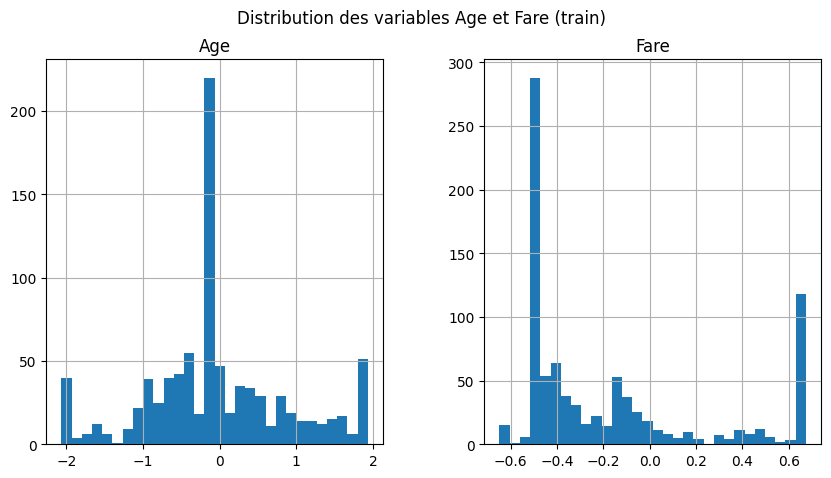

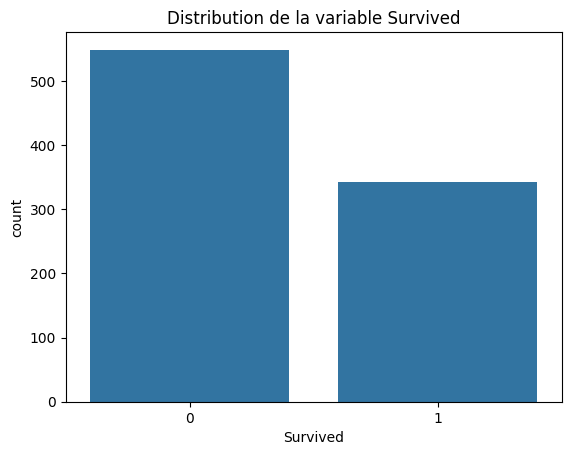

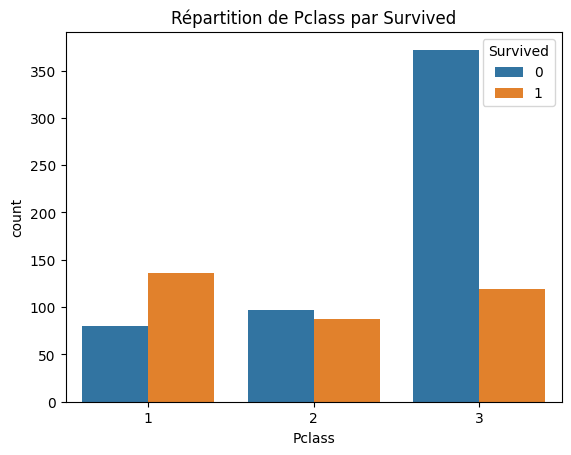

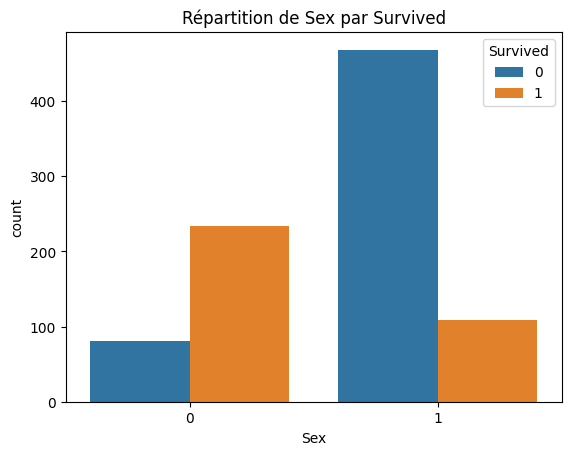

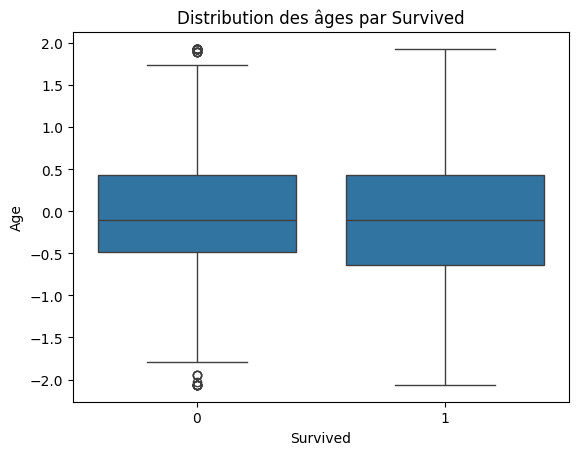

ValueError: Could not interpret value `Embarked` for `x`. An entry with this name does not appear in `data`.

In [44]:
# Affichage des premières lignes des datasets
print("Aperçu des données d'entraînement :")
print(train_df.head())
print("\nAperçu des données de test :")
print(test_df.head())

# Résumé statistique des données numériques
print("\nRésumé statistique des données d'entraînement :")
print(train_df.describe())
print("\nRésumé statistique des données de test :")
print(test_df.describe())



# Distribution des variables numériques
train_df[['Age', 'Fare']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Distribution des variables Age et Fare (train)')
plt.show()

# Distribution de la variable cible 'Survived'
sns.countplot(data=train_df, x='Survived')
plt.title('Distribution de la variable Survived')
plt.show()


# Analyse de la relation entre 'Pclass' et 'Survived'
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Répartition de Pclass par Survived')
plt.show()

# Analyse de la relation entre 'Sex' et 'Survived'
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Répartition de Sex par Survived')
plt.show()

# Boxplot des âges en fonction de la variable cible 'Survived'
sns.boxplot(data=train_df, x='Survived', y='Age')
plt.title('Distribution des âges par Survived')
plt.show()


# Affichage de la répartition des catégories de 'Embarked'
sns.countplot(data=train_df, x='Embarked')
plt.title('Répartition des catégories de Embarked')
plt.show()


# interpretaion
Les données d'entraînement montrent que 38% des passagers ont survécu, avec une majorité dans les classes 2 et 3 et un ratio hommes/femmes de 65%/35%. L'âge est normalisé, avec une grande variabilité, et la plupart des passagers étaient seuls à bord (faibles valeurs pour SibSp et Parch). Les tarifs sont négatifs après transformation, mais les passagers qui ont payé des tarifs plus élevés sont souvent de classe supérieure. Les données de test suivent les mêmes tendances, mais sans la colonne `Survived`, permettant de prédire la survie sur la base des autres variables.


# Matrice de correlation

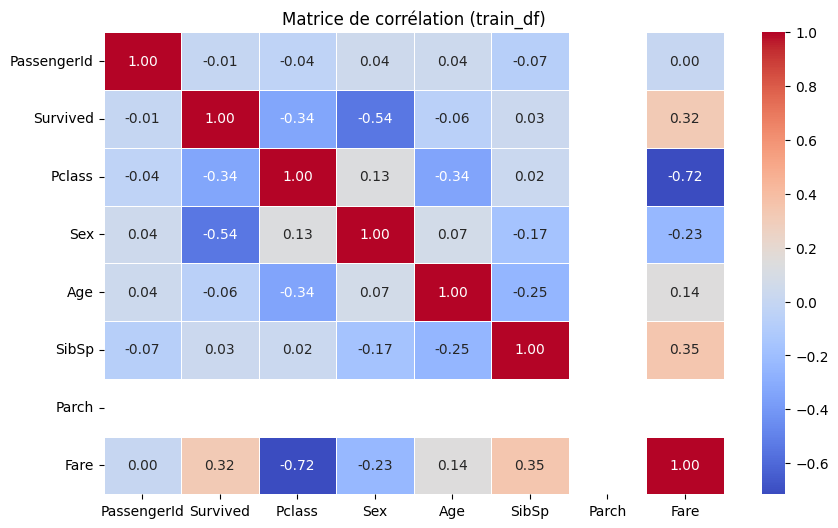

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036636 -0.072778   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.060622  0.031434   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.340404  0.023180   
Sex             0.042939 -0.543351  0.131900  1.000000  0.074740 -0.167885   
Age             0.036636 -0.060622 -0.340404  0.074740  1.000000 -0.247806   
SibSp          -0.072778  0.031434  0.023180 -0.167885 -0.247806  1.000000   
Parch                NaN       NaN       NaN       NaN       NaN       NaN   
Fare            0.003243  0.317430 -0.715300 -0.234969  0.144544  0.349615   

             Parch      Fare  
PassengerId    NaN  0.003243  
Survived       NaN  0.317430  
Pclass         NaN -0.715300  
Sex            NaN -0.234969  
Age            NaN  0.144544  
SibSp          NaN  0.349615  
Parch          NaN       NaN  
Fare           NaN  1.000000  


In [46]:

numeric_columns = train_df.select_dtypes(include=[np.number]).columns

# Calculer la matrice de corrélation
corr = train_df[numeric_columns].corr()

# Afficher la matrice de corrélation avec des annotations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation (train_df)')
plt.show()

# Afficher la matrice de corrélation sous forme de tableau pour copier
print(corr)


Survived est négativement corrélé avec Sex (-0.54), ce qui suggère que les femmes avaient plus de chances de survivre que les hommes.
Pclass est fortement corrélé négativement avec Fare (-0.72), indiquant que les passagers des classes inférieures ont payé des tarifs moins élevés.
SibSp et Fare ont une corrélation positive de 0.35, ce qui montre que les passagers avec plus de frères et sœurs/époux à bord ont souvent payé un tarif plus élevé.
Age montre une faible corrélation avec d'autres variables, sauf avec Pclass (-0.34), ce qui peut indiquer que les passagers plus âgés étaient plus susceptibles d'être dans des classes inférieures.
La colonne Parch a uniquement des valeurs manquantes, ce qui signifie qu'aucune relation n'a été calculée pour elle.

## 🤖 **Étape 2 : Modélisation et Prédiction**

# Modèle 1 : Régression Logistique

Régression Logistique - Performance :
Accuracy: 0.7933
AUC-ROC: 0.8820


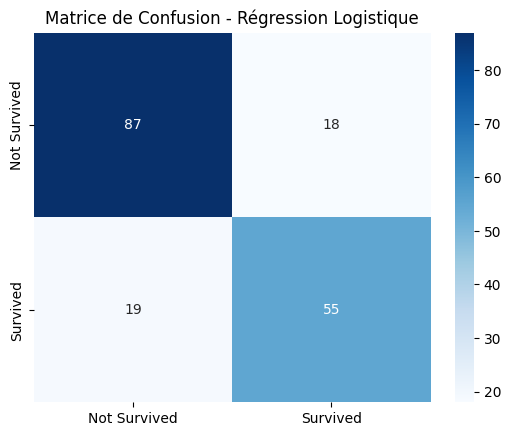

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Séparer les variables features (X) et l'étiquette (y)
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name'])
y = train_df['Survived']

# Diviser en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner le modèle de régression logistique
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = log_reg_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print(f"Régression Logistique - Performance :")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Matrice de confusion
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()


# Modèle 2 : K-Nearest Neighbors KNN

KNN - Performance :
Accuracy: 0.8268
AUC-ROC: 0.8702


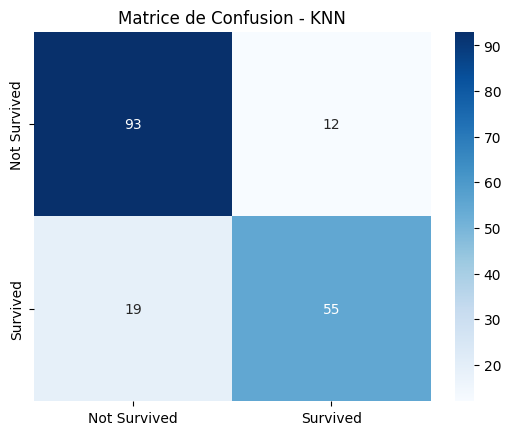

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_knn = knn_model.predict(X_test)

# Évaluation du modèle KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
auc_roc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print(f"KNN - Performance :")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"AUC-ROC: {auc_roc_knn:.4f}")

# Matrice de confusion
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Matrice de Confusion - KNN")
plt.show()


# Modèle 3 : Random Forest

Random Forest - Performance :
Accuracy: 0.8324
AUC-ROC: 0.8941


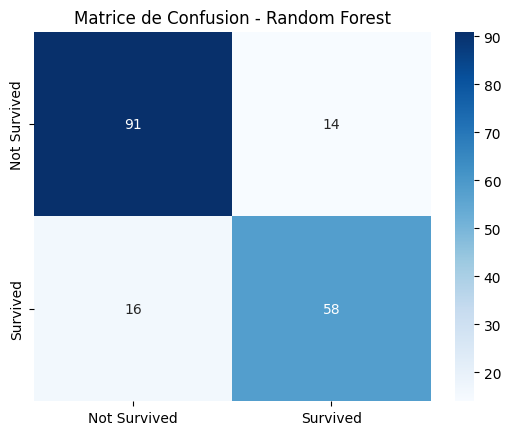

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Entraîner le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Affichage des résultats
print(f"Random Forest - Performance :")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC-ROC: {auc_roc_rf:.4f}")

# Matrice de confusion
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Matrice de Confusion - Random Forest")
plt.show()


### Résumé des performances des modèles

| Modèle               | Accuracy | AUC-ROC |
|----------------------|----------|---------|
| **Régression Logistique** | 0.7933   | 0.8820  |
| **KNN**               | 0.8268   | 0.8702  |
| **Random Forest**     | 0.8324   | 0.8941  |



# Évaluation avec l'apprentissage non supervisé 

Silhouette Score: 0.6258


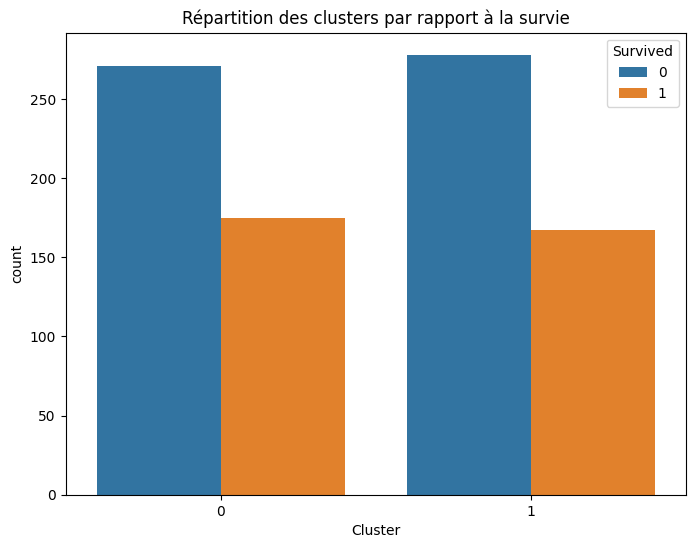

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques pour le clustering
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
X = train_df[numeric_columns]

# Appliquer le K-means avec un nombre de clusters prédéfini
kmeans = KMeans(n_clusters=2, random_state=42)
train_df['Cluster'] = kmeans.fit_predict(X)

# Silhouette Score pour évaluer la qualité du clustering
sil_score = silhouette_score(X, train_df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

# Visualisation de la répartition des clusters par rapport à la survie
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Survived', data=train_df)
plt.title('Répartition des clusters par rapport à la survie')
plt.show()


# interpre
Les clusters 0 et 1 montrent une répartition similaire des passagers survivants et non-survivants, avec une légère majorité de non-survivants dans chaque cluster. Cela indique que le clustering ne distingue pas clairement les survivants des non-survivants, suggérant qu'une approche supervisée pourrait être plus efficace pour la prédiction de la survie

# **Réponses aux Questions - Prétraitement, Modélisation et Clustering**

## **Partie 1 : Prétraitement des données**

### **Question 1.1 : Gestion des données manquantes**
Les options disponibles pour gérer les données manquantes incluent l'imputation et la suppression des valeurs. Pour le dataset Titanic :
- **"Age"** : Imputation par la **médiane**.
- **"Fare"** : Imputation par la **médiane**.
- **"Embarked"** : Imputation par la **modalité la plus fréquente**.
- **"Cabin"** : En raison des valeurs manquantes, je choisirais de **remplacer par "Unknown"**.

### **Question 1.2 : Encodage de la colonne "Sex"**
La colonne **"Sex"** sera encodée en utilisant la méthode **One-Hot Encoding**, qui crée une nouvelle colonne pour chaque catégorie (homme ou femme), permettant ainsi au modèle de traiter la variable comme une caractéristique binaire.

### **Question 1.3 : Mise à l'échelle des caractéristiques**
La mise à l'échelle est nécessaire pour les colonnes **"Age"** et **"Fare"** en raison de leur différence d'échelle. Cela permet d'optimiser les algorithmes sensibles aux échelles, comme la régression logistique ou le KNN.

### **Question 1.4 : Gestion des outliers dans "Fare"**
Les **outliers** dans "Fare" peuvent être identifiés via la méthode des quartiles (IQR). Je les supprimerai ou les ajusterai en utilisant la valeur du **quartile 3** ou une transformation appropriée.

---

## **Partie 2 : Construction d'un modèle supervisé**

### **Question 2.1 : Choix de l'algorithme**
Je choisirais la **régression logistique**, car elle est simple, efficace pour la classification binaire et permet d'obtenir des probabilités de survie, facilitant ainsi l'évaluation.

### **Question 2.2 : Division des données**
Les données seraient divisées en **80% pour l’entraînement** et **20% pour le test**. Cette proportion est courante, assurant une bonne balance entre apprentissage et évaluation.

### **Question 2.3 : Évaluation des performances**
Les performances du modèle seraient évaluées à l'aide des métriques suivantes :
- **Accuracy**
- **AUC-ROC**
- **Matrice de confusion**
Ces métriques offrent une bonne mesure de la précision, de la discrimination entre les classes et des erreurs du modèle.

### **Question 2.4 : Amélioration du modèle**
Si le modèle sous-performe, je commencerais par :
- **Ajuster les hyperparamètres** via une recherche en grille.
- **Améliorer l'ingénierie des caractéristiques**, en créant de nouvelles variables ou en traitant mieux les données manquantes.

---

## **Partie 3 : Évaluation avec l'apprentissage non supervisé**

### **Question 3.1 : Application du clustering**
J'utiliserais **K-means** pour le **clustering**. Cet algorithme regroupe les passagers selon leurs caractéristiques communes telles que l’âge, le prix du billet et la classe.

### **Question 3.2 : Évaluation du clustering**
L'efficacité du modèle non supervisé serait évaluée par le **Silhouette Score** et la comparaison des clusters avec les **étiquettes de survie** (passagers survivants et non-survivants).

### **Question 3.3 : Amélioration du modèle non supervisé**
Si le clustering ne donne pas de bons résultats, je testerais des algorithmes alternatifs comme **DBSCAN** ou **Hierarchical Clustering** et j'examinerais la **sélection des caractéristiques**.

### **Question 3.4 : Comparaison apprentissage supervisé vs non supervisé**
L’apprentissage non supervisé ne peut généralement pas atteindre la performance d'un modèle supervisé, car il ne bénéficie pas des **étiquettes de survie** pour optimiser les prédictions.


